# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [73]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        m, n = X.shape

        # Initialize weights randomly, bias to zero
        self.weights = np.random.randn(n)
        self.bias = 0

        for _ in range(self.epochs):
            # Forward pass: y = wx + b
            y_pred = X.dot(self.weights) + self.bias

            # Compute gradients
            residuals = y_pred - y
            grad_w = (2 / m) * X.T.dot(residuals)
            grad_b = (2 / m) * np.sum(residuals)

            # Update parameters
            self.weights -= self.lr * grad_w
            self.bias -= self.lr * grad_b

    def predict(self, X):
        return np.array(X).dot(self.weights) + self.bias

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

Null Values:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


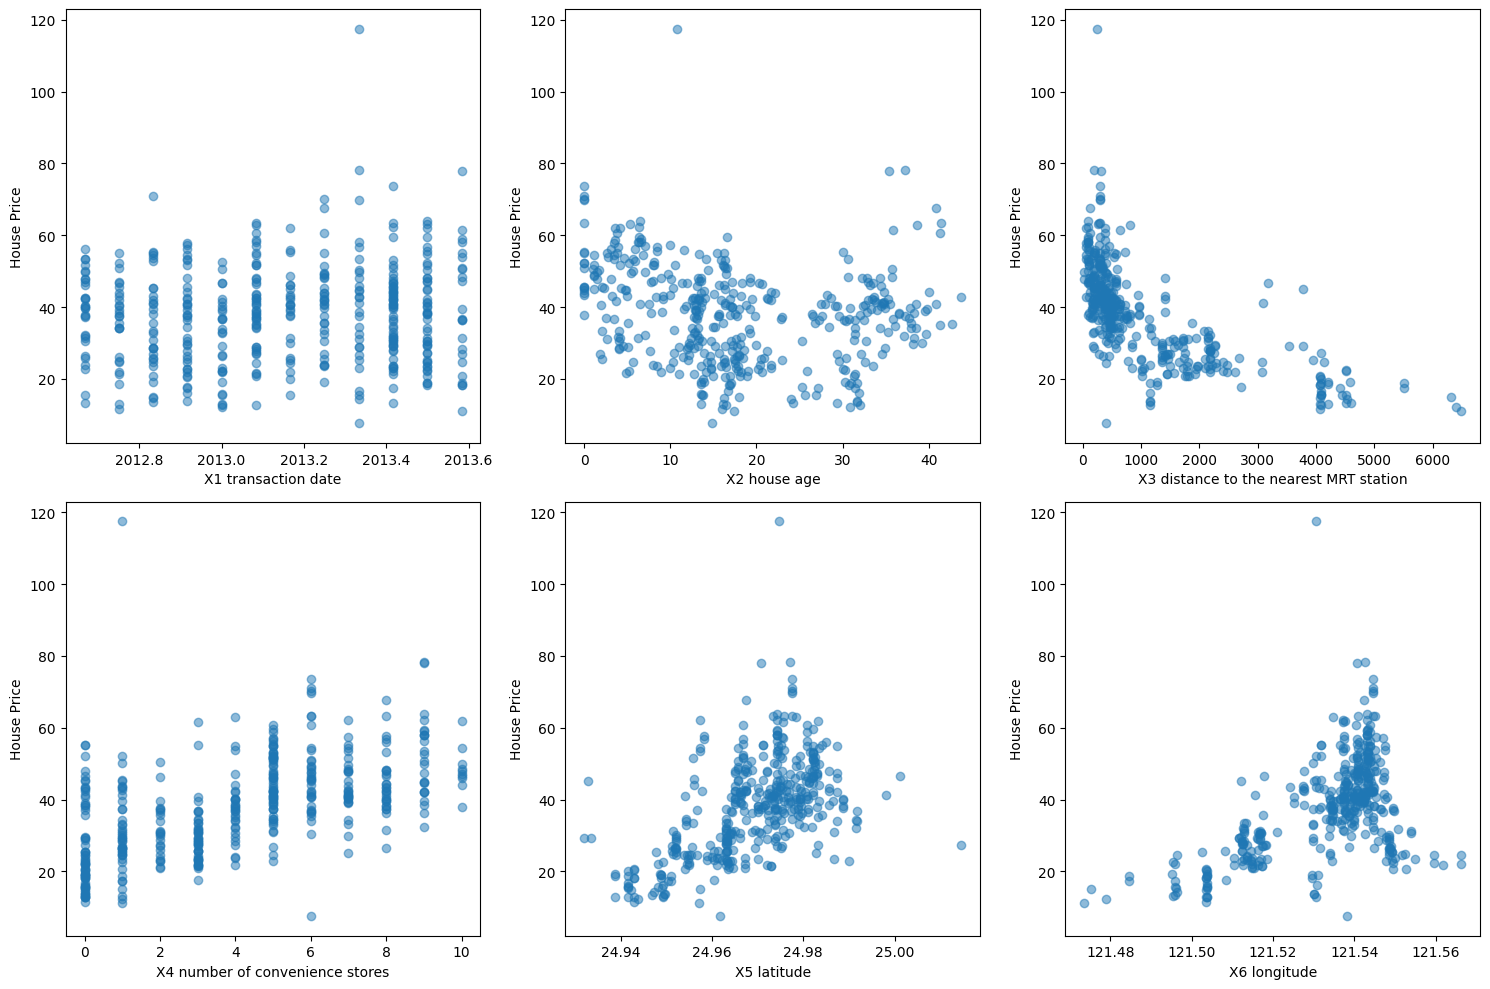


Linear Regression
Mean Squared Error: 63.7858
R2: 0.6114

Sklearn Linear Regression
Mean Squared Error: 63.7850
R2: 0.6114


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR

# Model from Question 1
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        m, n = X.shape

        self.weights = np.random.randn(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = X.dot(self.weights) + self.bias

            residuals = y_pred - y
            grad_w = (2 / m) * X.T.dot(residuals)
            grad_b = (2 / m) * np.sum(residuals)

            self.weights -= self.lr * grad_w
            self.bias -= self.lr * grad_b

    def predict(self, X):
        return np.array(X).dot(self.weights) + self.bias

# Load Data
data = pd.read_csv('Real estate.csv')

# Check Nulls
print("Null Values:\n", data.isnull().sum())

# Plotting
feature_cols = data.columns[1:-1]
target_col = data.columns[-1]

plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[col], data[target_col], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("House Price")
plt.tight_layout()
plt.show()

# Preprocessing
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=906)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model From (Question 1)
print("\nLinear Regression")
model = LinearRegression(learning_rate=0.1, epochs=10000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.4f}")
print(f"R2: {r2_score(y_test, predictions):.4f}")

# Sklearn Model
print("\nSklearn Linear Regression")
sk_model = SklearnLR()
sk_model.fit(X_train, y_train)

sk_preds = sk_model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, sk_preds):.4f}")
print(f"R2: {r2_score(y_test, sk_preds):.4f}")

# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
data = load_breast_cancer()

# 2. Separate X and y
X = data.data
y = data.target

# 3. Normalize the X data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Create train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=906)

# Verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (455, 30)
X_test shape: (114, 30)


5. Write code for the sigmoid function and Logistic regression.


In [76]:
import numpy as np
def sigmoid(z):
   return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    z_sigmoid=sigmoid(z)
    return z_sigmoid*(1-z_sigmoid)

class LogisticRegression_NONE:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features)
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights).reshape(-1,1)+self.bias
            y_pred = sigmoid(z)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -=self.lr * np.squeeze(dw)
            self.bias -=self.lr * db

    def predict(self, X):
      #Write the predict function
        z = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(z)

        # Convert probabilities to class labels (0 or 1)
        y_pred = [1 if i > 0.5 else 0 for i in predictions]
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLR

#LOgisticRegression Model (Standard)
print("LogisticRegression Model (No Penalty)")
custom_model = LogisticRegression_NONE(learning_rate=0.01, epochs=5000)
custom_model.fit(X_train, y_train)
pred_custom = custom_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred_custom):.4f}")

#Sklearn Model (No Penalty)
print("\nSklearn Model (No Penalty)")
sk_none = SklearnLR(penalty=None, solver='saga', max_iter=5000, random_state=906)
sk_none.fit(X_train, y_train)
pred_sk = sk_none.predict(X_test)
print(f"Sklearn Accuracy: {accuracy_score(y_test, pred_sk):.4f}")

LogisticRegression Model (No Penalty)
Accuracy: 0.9649

Sklearn Model (No Penalty)
Sklearn Accuracy: 0.9737


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [78]:
# --- Define Class for Lasso (L1) ---
class LogisticRegression_L1:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_param=0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights).reshape(-1, 1) + self.bias
            # Sigmoid
            y_pred = 1 / (1 + np.exp(-z))

            # 1. Calculate Base Gradient (Shape: 30, 1)
            dw_base = (1 / n_samples) * np.dot(X.T, (y_pred - y))

            # 2. Squeeze to make it 1D (Shape: 30,)
            dw_base = np.squeeze(dw_base)

            # 3. Add L1 Penalty (Shape: 30,)
            dw = dw_base + (self.lambda_param * np.sign(self.weights))

            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update (Shape: 30,)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = 1 / (1 + np.exp(-z))
        return (predictions > 0.5).astype(int)

# --- Execution ---
print("LogisticRegression Model (Lasso / L1)")
model = LogisticRegression_L1(learning_rate=0.01, epochs=5000, lambda_param=0.001)
model.fit(X_train, y_train)
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

#Sklearn Model (L1 Penalty)
print("\nSklearn Model (L1 / Lasso)")
sk_l1 = SklearnLR(penalty='l1', solver='saga', max_iter=5000, random_state=906)
sk_l1.fit(X_train, y_train)
pred_sk_l1 = sk_l1.predict(X_test)
print(f"Sklearn Accuracy: {accuracy_score(y_test, pred_sk_l1):.4f}")

LogisticRegression Model (Lasso / L1)
Accuracy: 0.9825

Sklearn Model (L1 / Lasso)
Sklearn Accuracy: 0.9737


In [79]:
# --- Define Class for Ridge (L2) ---
class LogisticRegression_L2:
    def __init__(self, learning_rate=0.01, epochs=5000, lambda_param=0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights).reshape(-1, 1) + self.bias
            # Sigmoid
            y_pred = 1 / (1 + np.exp(-z))

            # 1. Calculate Base Gradient
            dw_base = (1 / n_samples) * np.dot(X.T, (y_pred - y))

            # 2. Squeeze to make it 1D
            dw_base = np.squeeze(dw_base)

            # 3. Add L2 Penalty
            dw = dw_base + (self.lambda_param * self.weights)

            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = 1 / (1 + np.exp(-z))
        return (predictions > 0.5).astype(int)

# --- Execution ---
print("LogisticRegression Model (Ridge / L2)")
model = LogisticRegression_L2(learning_rate=0.01, epochs=5000, lambda_param=0.01)
model.fit(X_train, y_train)
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")

#Sklearn Model (L2 Penalty)
print("\nSklearn Model (L2 / Ridge)")
sk_l2 = SklearnLR(penalty='l2', solver='saga', max_iter=5000, random_state=906)
sk_l2.fit(X_train, y_train)
pred_sk_l2 = sk_l2.predict(X_test)
print(f"Sklearn Accuracy: {accuracy_score(y_test, pred_sk_l2):.4f}")

LogisticRegression Model (Ridge / L2)
Accuracy: 0.9912

Sklearn Model (L2 / Ridge)
Sklearn Accuracy: 0.9912


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

Best LogisticRegression Model (L2 Penalty)

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[46  3]
 [ 2 63]]


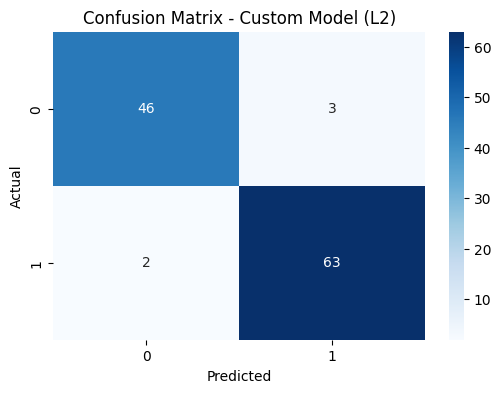

--- Best Sklearn Model (L2 Penalty) ---

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        65

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Confusion Matrix:
[[48  1]
 [ 0 65]]


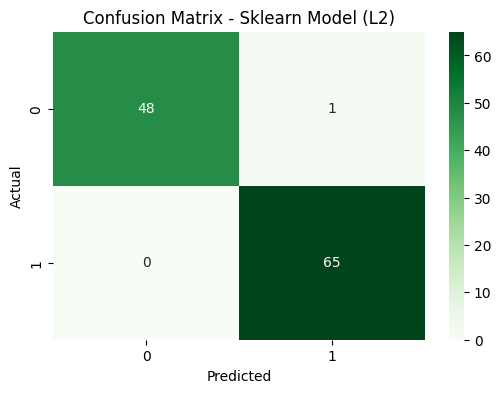

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression as SklearnLR
import seaborn as sns
import matplotlib.pyplot as plt
print("Best LogisticRegression Model (L2 Penalty)")
# lambda_param=0.01 is a common starting point for L2
best_custom = LogisticRegression_L2(learning_rate=0.01, epochs=3000, lambda_param=0.01)
best_custom.fit(X_train, y_train)
custom_preds = best_custom.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, custom_preds))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, custom_preds)
print(cm)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Custom Model (L2)')
plt.show()

#Train and Evaluate
print("--- Best Sklearn Model (L2 Penalty) ---")
best_sklearn = SklearnLR(penalty='l2', solver='saga', max_iter=5000, random_state=42)
best_sklearn.fit(X_train, y_train)
sk_preds = best_sklearn.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, sk_preds))

print("\nConfusion Matrix:")
cm_sk = confusion_matrix(y_test, sk_preds)
print(cm_sk)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sklearn Model (L2)')
plt.show()

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_csv('glass.csv')

# 2. Extract X and Y columns
# Assuming col 0 is ID, cols 1:-1 are features, last col is Type
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# 3. Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (160, 8)
Testing Data Shape: (54, 8)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [82]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        # KNN is a lazy learner; it just stores the training data
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # 1. Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 2. Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # 3. Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 4. Return the most common class label (Majority Vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# --- Fitting the Model ---
# Initialize the model with k=3
knn_model = KNN(k=3)

# Fit on the training data (from previous step)
knn_model.fit(X_train, y_train)

print("KNN model built and fitted successfully.")

KNN model built and fitted successfully.


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [83]:
from sklearn.metrics import accuracy_score

# Test different k values
k_values = [3, 5, 7]

print("KNN Model Results")
for k in k_values:
    # Initialize and fit
    my_knn = KNN(k=k)
    my_knn.fit(X_train, y_train)

    # Predict
    my_preds = my_knn.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, my_preds)
    print(f"k={k} | Accuracy: {acc:.4f}")

KNN Model Results
k=3 | Accuracy: 0.7407
k=5 | Accuracy: 0.6667
k=7 | Accuracy: 0.6481


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Sklearn KNN Model Results")

# Initialize Sklearn model (using k=3 to match our best custom result)
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

# Predict
sk_preds = sk_knn.predict(X_test)

# Evaluate
sk_acc = accuracy_score(y_test, sk_preds)
print(f"Sklearn (k=3) | Accuracy: {sk_acc:.4f}")

Sklearn KNN Model Results
Sklearn (k=3) | Accuracy: 0.6667
